In [87]:
# Import the needed libraries
import pandas as pd
import statistics as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [580]:
# Read CSV dataset
df1 = pd.read_csv('https://github.com/gertagenbag/lending-club-case-study/raw/main/dataset/loan.csv', low_memory=False)
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [89]:
# Check the data types
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [90]:
# Drop the empty columns
df1.dropna(how='all', axis=1, inplace=True)

In [91]:
# Find the percentage of null values in each column
df1.isnull().sum() * 100 / len(df1)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [92]:
# Convert the term column to integer
df1['term'] = df1['term'].str.replace('months', '').str.strip()
df1['term'] = df1['term'].astype(int)

In [93]:
# Convert the interest rate column to float
df1['int_rate'] = df1['int_rate'].str.replace('%', '')
df1['int_rate'] = df1['int_rate'].astype(float)

In [94]:
# Convert the payment plan column to boolean
df1['pymnt_plan'] = df1['pymnt_plan'].str.replace('n', '0')
df1['pymnt_plan'] = df1['pymnt_plan'].str.replace('y', '1')
df1['pymnt_plan'] = df1['pymnt_plan'].astype(bool)

In [95]:
# Convert the revolving line utilization rate column to float
df1['revol_util'] = df1['revol_util'].str.replace('%', '')
df1['revol_util'] = df1['revol_util'].astype(float)

In [96]:
# Define functions for parsing dates
def parse_year(raw_date):
    if (raw_date[0].isdigit()):
        year = raw_date[:2]
    else:
        year = raw_date[-2:]
    
    year = int(year)
    
    if (year >= 22):
        year = year + 1900
    else:
        year = year + 2000
    
    return year

def parse_month(raw_date):
    month_names = {'Jan':1,
                   'Feb':2,
                   'Mar':3,
                   'Apr':4,
                   'May':5,
                   'Jun':6,
                   'Jul':7,
                   'Aug':8,
                   'Sep':9,
                   'Oct':10,
                   'Nov':11,
                   'Dec':12}
    
    if (raw_date[0].isdigit()):
        month_string = raw_date[-3:]
    else:
        month_string = raw_date[:3]
    
    month = month_names[month_string]
    return month

In [97]:
# Break the issue date column to year and month columns
df1['issue_d_year'] = df1['issue_d'].apply(parse_year)
df1['issue_d_month'] = df1['issue_d'].apply(parse_month)
df1.drop('issue_d', axis=1, inplace=True)

In [99]:
# Break the earliest credit column to year and month columns
df1['earliest_cr_line_year'] = df1['earliest_cr_line'].apply(parse_year)
df1['earliest_cr_line_month'] = df1['earliest_cr_line'].apply(parse_month)
df1.drop('earliest_cr_line', axis=1, inplace=True)

In [67]:
# Check the data types
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int32  
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [101]:
# Check if there are any duplicate members
df1['member_id'].value_counts()

1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64

In [428]:
# Calculate the loan repayment as a pertange of the applicant's income
df1['loan_afford'] = df1['installment'] * 12 / df1['annual_inc'] * 100

In [103]:
# Define functions to calculate the elapsed years and months
def elapsed_years(start_year, start_month, end_year, end_month):
    elapsed_years = (end_year + (end_month - 1)/12) - (start_year + (start_month - 1)/12)
    return elapsed_years

def elapsed_months(start_year, start_month, end_year, end_month):
    elapsed_months = (end_year*12 + end_month) - (start_year*12 + start_month)
    return elapsed_months

In [104]:
# Calculate the months of credit history that applicant had when the loan was issued
df1['mths_of_credit_hist'] = elapsed_months(df1['earliest_cr_line_year'], df1['earliest_cr_line_month'], df1['issue_d_year'], df1['issue_d_month'])

In [451]:
# Devide the data frame by loan status
df_fully_paid = df1[df1['loan_status'] == 'Fully Paid']
df_charged_off = df1[df1['loan_status'] == 'Charged Off']
df_current = df1[df1['loan_status'] == 'Current']

In [107]:
# Find the number of loans by status
df1['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

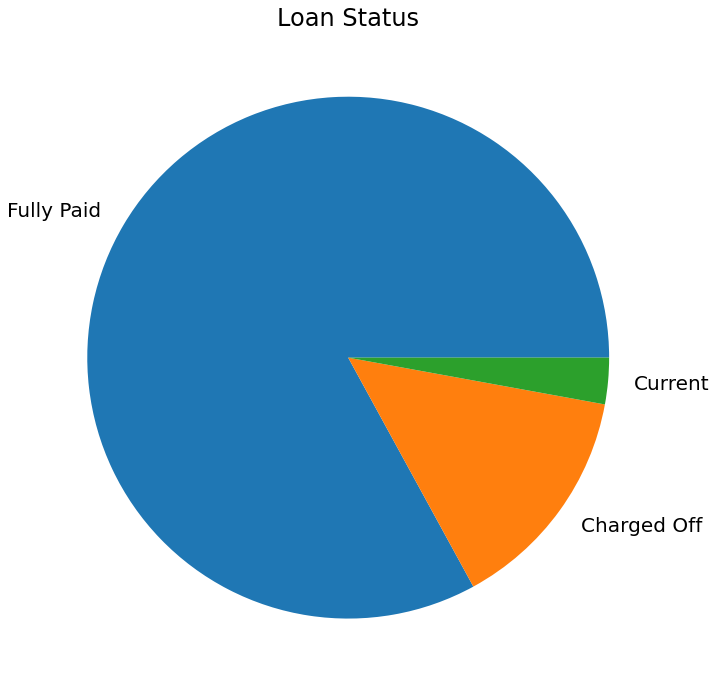

In [501]:
# Plot the distribution of the loan status in the dataset
df1['loan_status'].value_counts().plot.pie(figsize=(12,12), textprops={'size': 20})
plt.title('Loan Status')
plt.ylabel('')
plt.show()

In [ ]:
# Remove the loans that have not been completed
df_completed = df1[df1['loan_status'] != 'Current']
df_completed.shape

C:\Users\Gert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


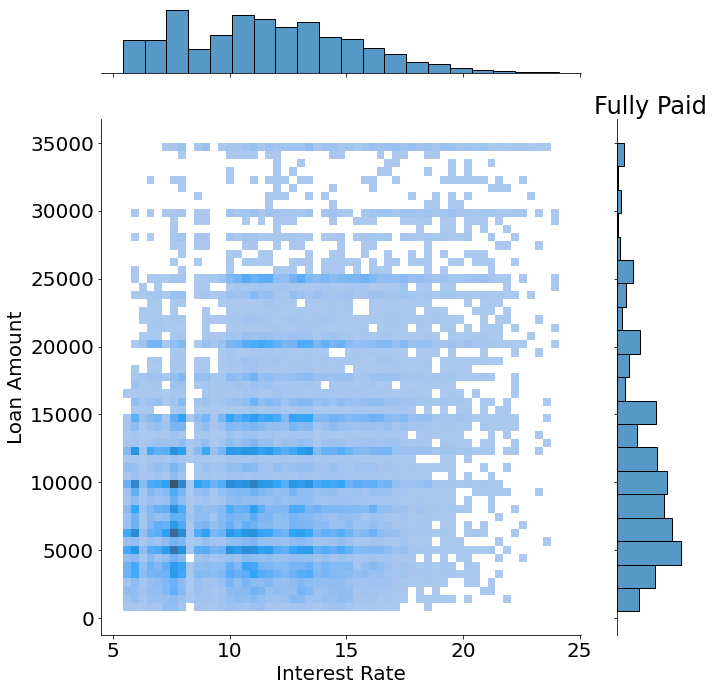

In [497]:
# Plot how the loan amounts and interest rates are related for fully paid loans
h = sns.jointplot(df_fully_paid['int_rate'], df_fully_paid['loan_amnt'], kind="hist", height=10, marginal_kws=dict(bins=20, fill=True))
plt.title('Fully Paid')
h.set_axis_labels('Interest Rate', 'Loan Amount', fontsize=20)
h.figure.tight_layout()
plt.show()

C:\Users\Gert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


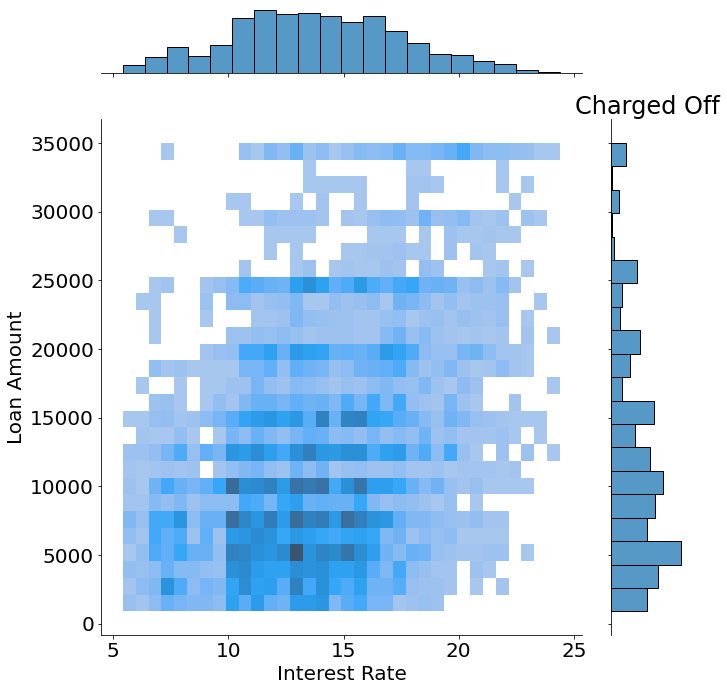

In [498]:
# Plot how the loan amounts and interest rates are related for bad loans
h = sns.jointplot(df_charged_off['int_rate'], df_charged_off['loan_amnt'], kind="hist", height=10, marginal_kws=dict(bins=20, fill=True))
plt.title('Charged Off')
h.set_axis_labels('Interest Rate', 'Loan Amount', fontsize=20)
h.figure.tight_layout()
plt.show()

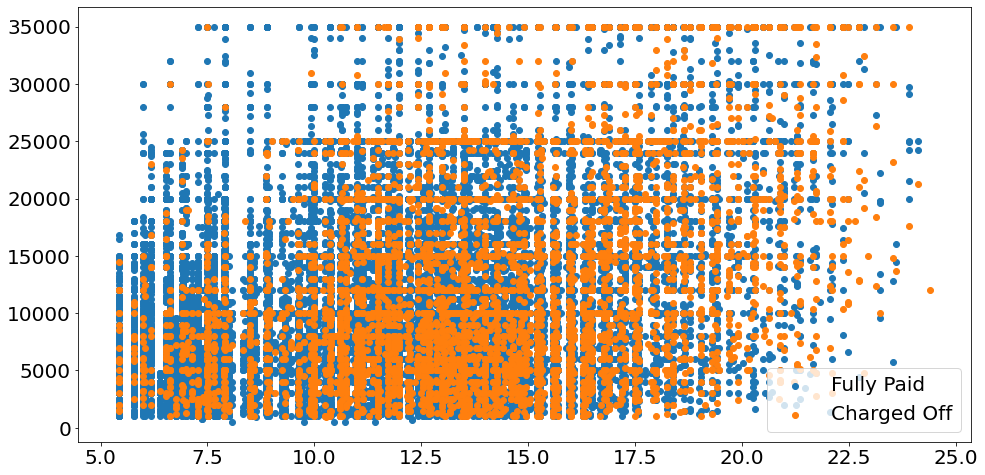

In [456]:
# Plot how the loan amounts and interest rates are related for completed loans
plt.figure(figsize=(16,8))
plt.scatter(df_fully_paid['int_rate'], df_fully_paid['loan_amnt'])
plt.scatter(df_charged_off['int_rate'], df_charged_off['loan_amnt'])
labels = ['Fully Paid', 'Charged Off']
plt.legend(labels)
plt.xlabel('Loan Amount')
plt.ylabel('Number of Completed Loans')

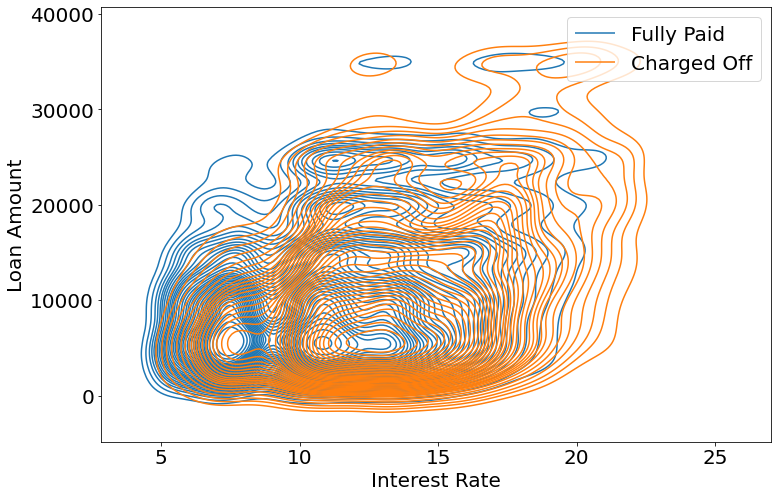

In [482]:
# Plot how the loan amounts and interest rates are related for completed loans
figure = plt.figure(figsize=(12,8))
sns.kdeplot(x=df_fully_paid['int_rate'], y=df_fully_paid['loan_amnt'], levels=40, fill=False)
sns.kdeplot(x=df_charged_off['int_rate'], y=df_charged_off['loan_amnt'], levels=40, fill=False)
labels = ['Fully Paid', 'Charged Off']
plt.legend(labels)
plt.xlabel("Interest Rate")
plt.ylabel("Loan Amount")
plt.show()

C:\Users\Gert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


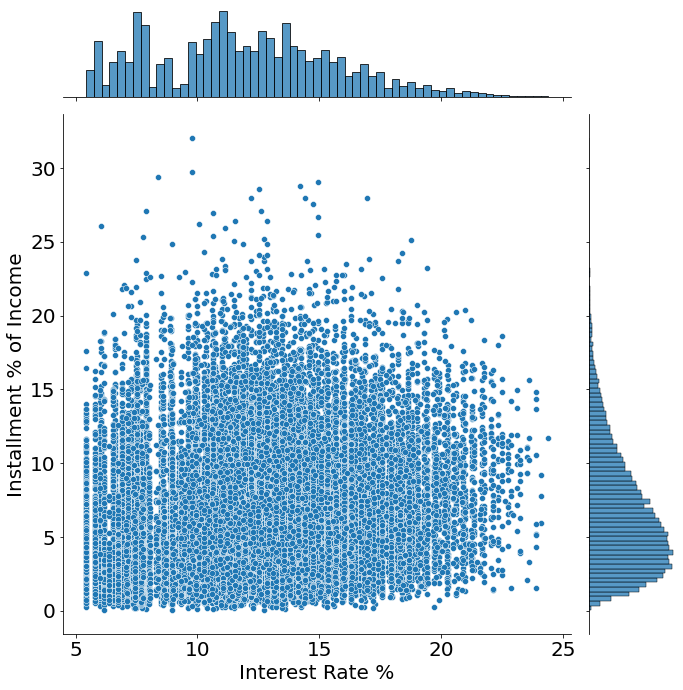

In [525]:
# Plot how the loan affordability and interest rates are related for completed loans
grid = sns.jointplot(df_completed['int_rate'], df_completed['loan_afford'], height=10)
grid.set_axis_labels('Interest Rate %', 'Installment % of Income')

C:\Users\Gert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


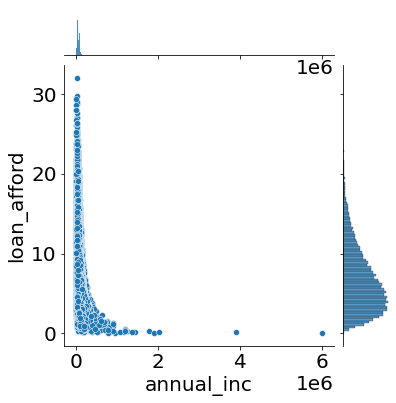

In [430]:
# Plot how the loan affordability and annual income are related for completed loans
sns.jointplot(df1['annual_inc'], df1['loan_afford'])

In [431]:
# Remove the outliers of annual income
df_income_outliers_removed = df1[df1['annual_inc'] < 250000]

C:\Users\Gert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


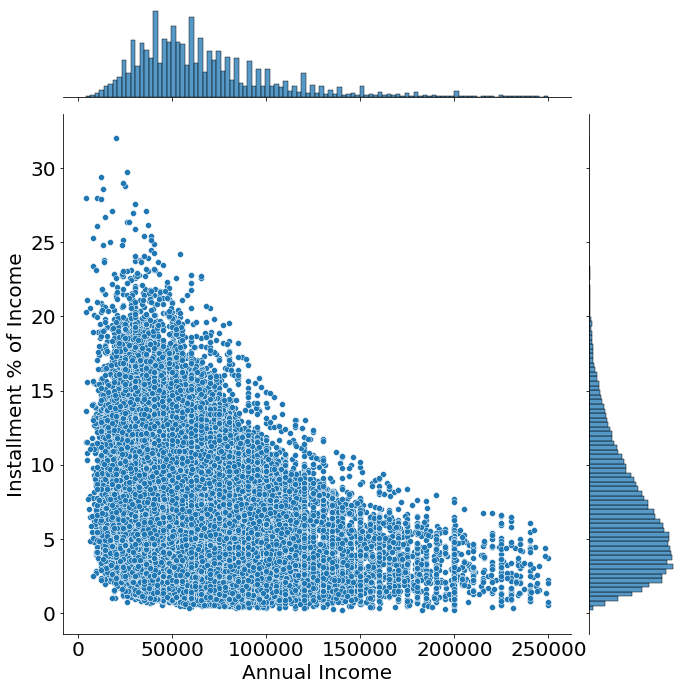

In [448]:
# Plot how the loan affordability and annual income are related for completed loans
grid = sns.jointplot(df_income_outliers_removed['annual_inc'], df_income_outliers_removed['loan_afford'], height=10)
grid.set_axis_labels('Annual Income', 'Installment % of Income')

In [526]:
# Extract some numerical parameters into a new dataframe for analysis
df2 = df_completed[['loan_amnt', 'int_rate', 'term', 'annual_inc', 'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec_bankruptcies', 'mths_of_credit_hist', 'loan_afford']]

In [527]:
# Compute the correlation between parameters
df_corr = df2.corr()
df_corr

,loan_amnt,int_rate,term,annual_inc,delinq_2yrs,mths_since_last_delinq,pub_rec_bankruptcies,mths_of_credit_hist,loan_afford
loan_amnt,1.000000,0.301265,0.346650,0.268999,-0.031951,0.015440,-0.035981,0.198638,0.513583
int_rate,0.301265,1.000000,0.440206,0.048899,0.158479,-0.054307,0.083027,-0.122029,0.183388
term,0.346650,0.440206,1.000000,0.043866,0.007270,0.038646,0.014529,0.070579,0.012221
annual_inc,0.268999,0.048899,0.043866,1.000000,0.022229,-0.007442,-0.016224,0.181151,-0.250297
delinq_2yrs,-0.031951,0.158479,0.007270,0.022229,1.000000,-0.567607,0.003404,0.064559,-0.050122
mths_since_last_delinq,0.015440,-0.054307,0.038646,-0.007442,-0.567607,1.000000,0.025681,0.018557,0.000573
pub_rec_bankruptcies,-0.035981,0.083027,0.014529,-0.016224,0.003404,0.025681,1.000000,0.057955,-0.019966
mths_of_credit_hist,0.198638,-0.122029,0.070579,0.181151,0.064559,0.018557,0.057955,1.000000,-0.074330
loan_afford,0.513583,0.183388,0.012221,-0.250297,-0.050122,0.000573,-0.019966,-0.074330,1.000000


Text(0.5, 1.0, 'Correlation')

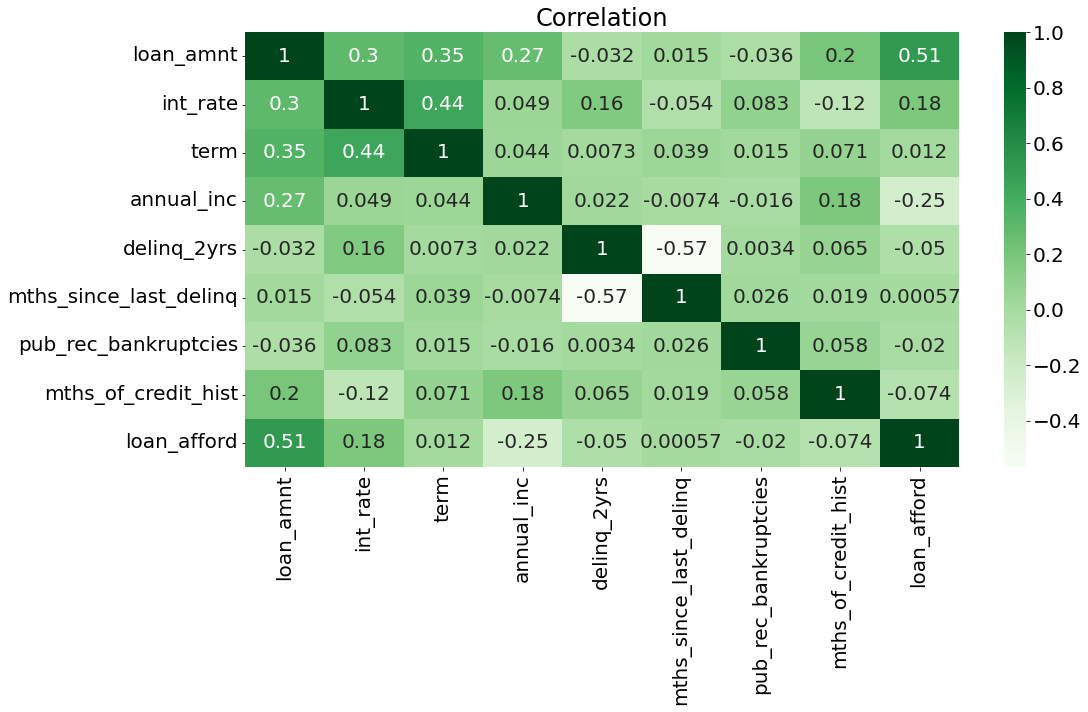

In [528]:
# Plot the correlations
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, cmap='Greens', annot=True)
plt.title('Correlation')

Text(0.5, 0, 'Months of Credit History')

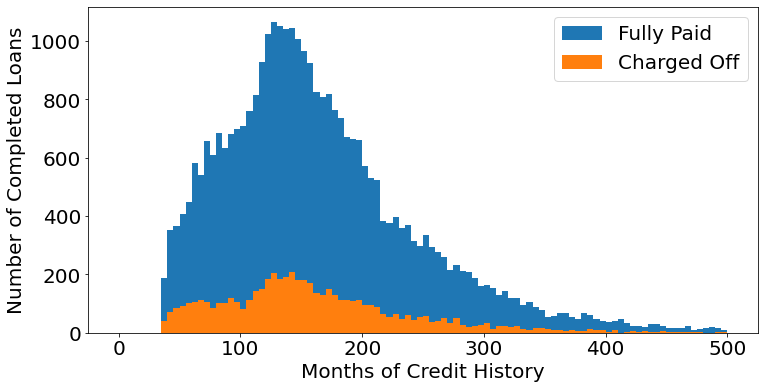

In [420]:
# Check if there is the months of credit history plays a role in loan status
plt.figure(figsize=(12,6))
plt.hist(df_fully_paid['mths_of_credit_hist'], 100, range=(0,500))
plt.hist(df_charged_off['mths_of_credit_hist'], 100, range=(0,500))
labels = ['Fully Paid', 'Charged Off']
plt.legend(labels)
plt.ylabel('Number of Completed Loans')
plt.xlabel('Months of Credit History')

C:\Users\Gert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


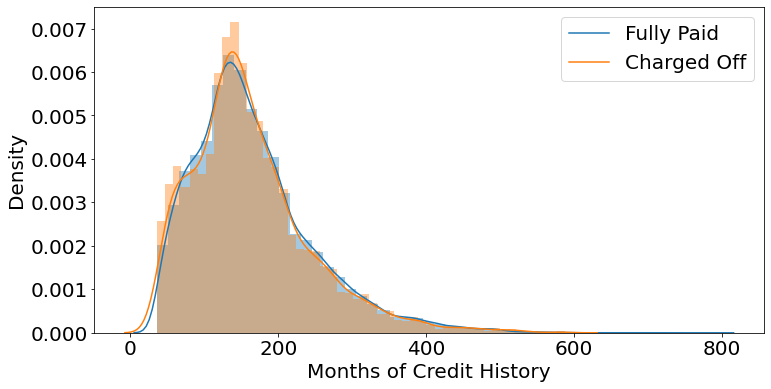

In [577]:
plt.figure(figsize = (12,6))
g = sns.distplot(df_fully_paid['mths_of_credit_hist'])
g = sns.distplot(df_charged_off['mths_of_credit_hist'])
#g.set_title("Months of Credit History", fontsize=20)
plt.legend(['Fully Paid', 'Charged Off'])
plt.xlabel('Months of Credit History')
plt.show()

In [132]:
# Find the min and max loan amount values
max_loan = df1['loan_amnt'].max()
min_loan = df1['loan_amnt'].min()
print("Min loan value:", min_loan)
print("Max loan value:", max_loan)

Min loans value: 500
Max loans value: 35000


Text(0, 0.5, 'Number of Completed Loans')

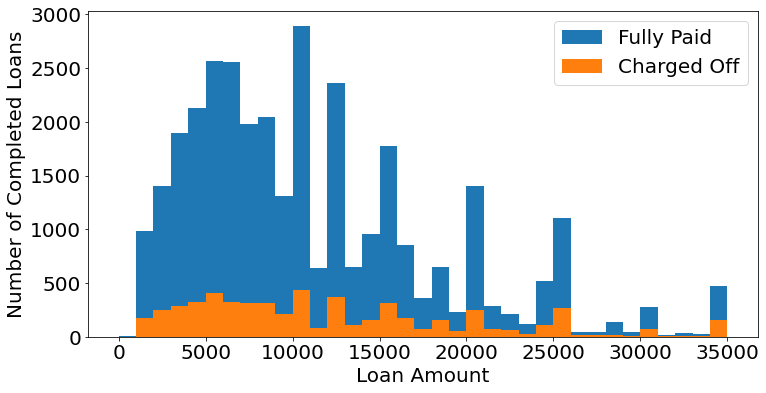

In [417]:
# Plot the histogram of loan amounts by count
plt.figure(figsize=(12,6))
plt.hist(df_fully_paid['loan_amnt'], 35, range=(0,max_loan))
plt.hist(df_charged_off['loan_amnt'], 35, range=(0,max_loan))
labels = ['Fully Paid', 'Charged Off']
plt.legend(labels)
plt.xlabel('Loan Amount')
plt.ylabel('Number of Completed Loans')

C:\Users\Gert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


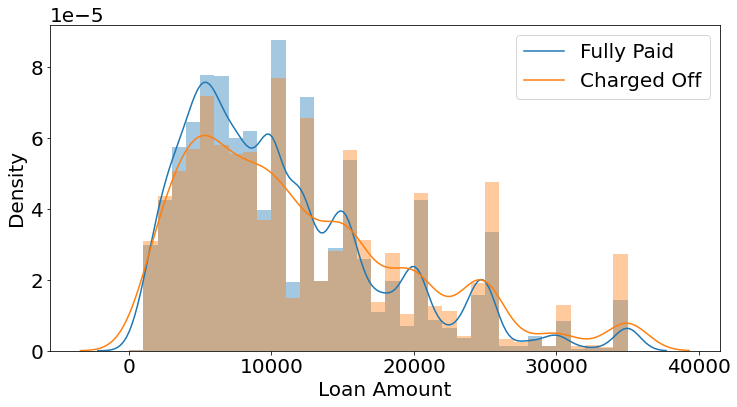

In [578]:
# Plot the histogram of loan amounts by density
plt.figure(figsize = (12,6))
amount_bins = range(0, 36000, 1000)
g = sns.distplot(df_fully_paid['loan_amnt'], bins=amount_bins)
g = sns.distplot(df_charged_off['loan_amnt'], bins=amount_bins)
plt.legend(['Fully Paid', 'Charged Off'])
plt.xlabel('Loan Amount')
plt.show()

Text(0, 0.5, 'Number of Completed Loans')

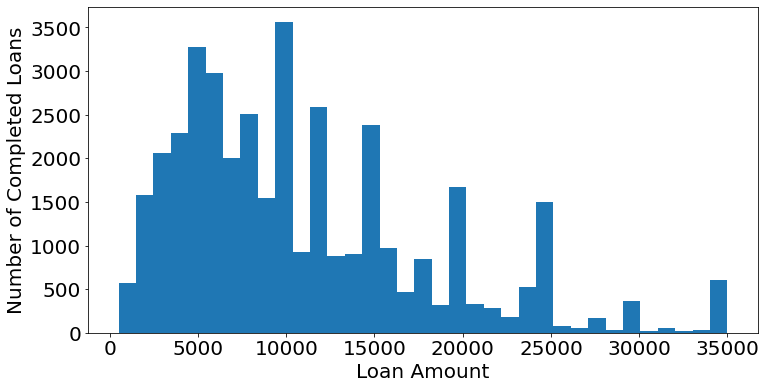

In [576]:
# Plot the histogram of loan amounts by count
plt.figure(figsize=(12,6))
plt.hist(df_completed['loan_amnt'], int(max_loan/1000))
plt.xlabel('Loan Amount')
plt.ylabel('Number of Completed Loans')

In [396]:
# Find the proportion of bad loans by loan amount buckets $1000
loan_cut_bins = range(0, max_loan +1000, 1000)
fully_paid_loan_amount_buckets = pd.cut(df_fully_paid['loan_amnt'], bins=loan_cut_bins, right=True)
charged_off_loan_amount_buckets = pd.cut(df_charged_off['loan_amnt'], bins=loan_cut_bins, right=True)
bad_loan_ratio_by_amount = charged_off_loan_amount_buckets.value_counts() / (charged_off_loan_amount_buckets.value_counts() + fully_paid_loan_amount_buckets.value_counts()) * 100

Text(0, 0.5, 'Loan Default Ratio %')

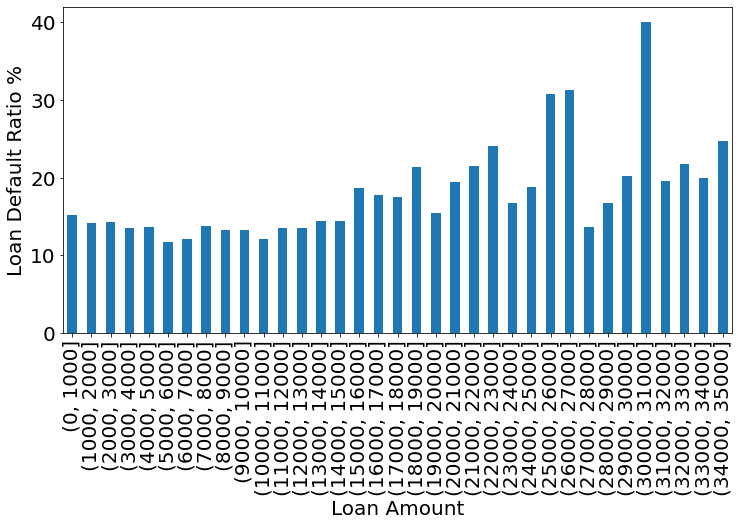

In [400]:
# Plot the proportion of bad loans by amount bucket
plt.figure(figsize=(12,6))
bad_loan_ratio_by_amount.plot.bar()
plt.xlabel('Loan Amount')
plt.ylabel('Loan Default Ratio %')

In [142]:
# Find the maximum loan installment amount
max_installment = df1['installment'].max()
print("Max installment amount:", max_installment)

Max installment amount: 1305.19


Text(0, 0.5, 'Number of Loans')

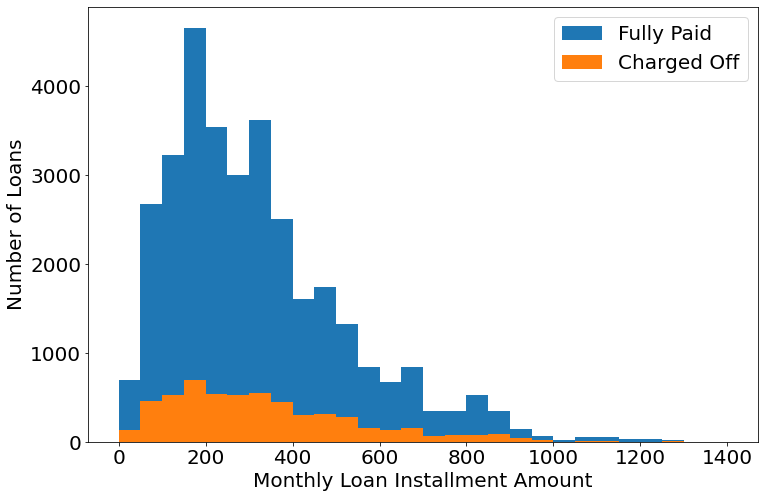

In [418]:
# Plot the histogram of loan installment amounts
plt.figure(figsize=(12,8))
plt.hist(df_fully_paid['installment'], 28, range=(0, 1400))
plt.hist(df_charged_off['installment'], 28, range=(0, 1400))
labels = ['Fully Paid', 'Charged Off']
plt.legend(labels)
plt.xlabel('Monthly Loan Installment Amount')
plt.ylabel('Number of Loans')
plt.show()

In [562]:
# Find the distribution of bad loans by installment amount
installment_cut_bins = range(0, 1400, 50)
fully_paid_installment_amount_buckets = pd.cut(df_fully_paid['installment'], bins=installment_cut_bins, right=True)
charged_off_installment_amount_buckets = pd.cut(df_charged_off['installment'], bins=installment_cut_bins, right=True)
bad_loan_ratio_by_installment = charged_off_installment_amount_buckets.value_counts() / (charged_off_installment_amount_buckets.value_counts() + fully_paid_installment_amount_buckets.value_counts()) * 100

Text(0, 0.5, 'Proportion of Bad Loans %')

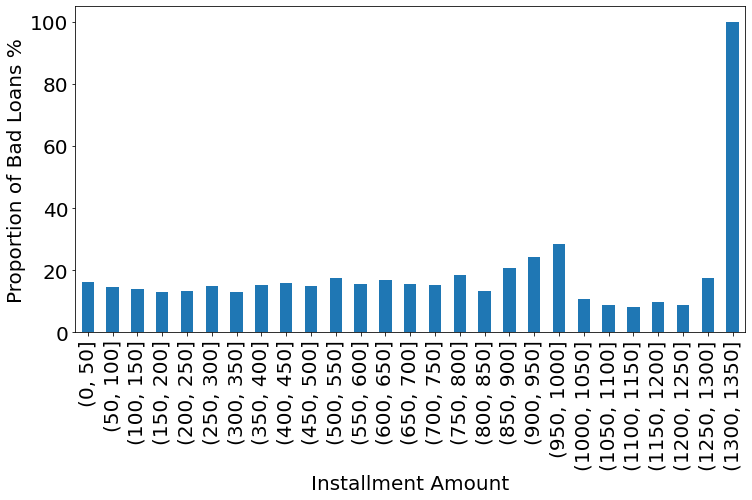

In [563]:
# Plot the distribution of bad loans by installment amount
plt.figure(figsize=(12,6))
bad_loan_ratio_by_installment.plot.bar()
plt.xlabel('Installment Amount')
plt.ylabel('Proportion of Bad Loans %')

In [568]:
# Find the median loan amount
df_completed['installment'].median()

277.86

In [566]:
# Find the number of loans by installment amount
plt.figure(figsize=(12,6))
installment_amount_buckets = pd.cut(df_completed['installment'], bins=installment_cut_bins, right=True)
installment_amount_counts = installment_amount_buckets.value_counts()
installment_amount_counts

(150, 200]      5351
(300, 350]      4168
(200, 250]      4083
(100, 150]      3745
(250, 300]      3525
(50, 100]       3146
(350, 400]      2956
(450, 500]      2053
(400, 450]      1903
(500, 550]      1603
(550, 600]      1004
(650, 700]       992
(0, 50]          832
(600, 650]       816
(800, 850]       609
(850, 900]       442
(750, 800]       423
(700, 750]       406
(900, 950]       197
(950, 1000]       88
(1100, 1150]      60
(1050, 1100]      57
(1200, 1250]      34
(1150, 1200]      31
(1000, 1050]      28
(1250, 1300]      23
(1300, 1350]       2
Name: installment, dtype: int64

<Figure size 864x432 with 0 Axes>

In [180]:
# Find the minimum and maximum interested rates charged on loans
min_int_rate = df1['int_rate'].min()
max_int_rate = df1['int_rate'].max()
print("Min interest rate:", min_int_rate)
print("Max interest rate:", max_int_rate)

Min interest rate: 5.42
Max interest rate: 24.59


In [388]:
# Find the proportion of bad loans by interest bucket
interest_rate_cut_bins = range(5, 26)
fully_paid_loan_interest_rate_buckets = pd.cut(df_fully_paid['int_rate'], bins=interest_rate_cut_bins, right=True)
charged_off_loan_interest_rate_buckets = pd.cut(df_charged_off['int_rate'], bins=interest_rate_cut_bins, right=True)
bad_loan_ratio_by_interest_rate = charged_off_loan_interest_rate_buckets.value_counts() / (charged_off_loan_interest_rate_buckets.value_counts() + fully_paid_loan_interest_rate_buckets.value_counts()) * 100

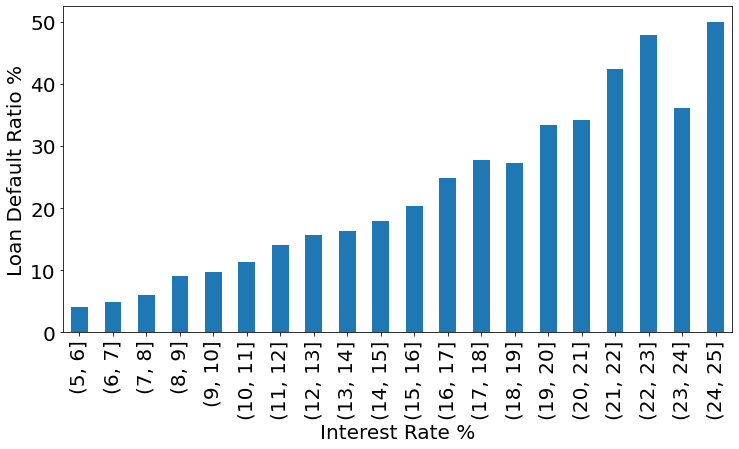

In [569]:
# Plot the proportion of bad loans by interest bucket
bad_loan_ratio_by_interest_rate.plot.bar(figsize=(12,6))
plt.xlabel('Interest Rate %')
plt.ylabel('Loan Default Ratio %')
plt.show()

Text(0, 0.5, 'Number of Completed Loans')

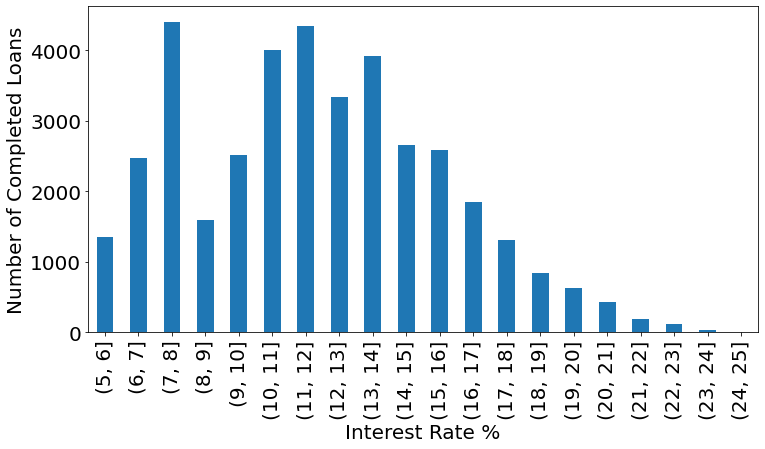

In [402]:
# Plot the number of completed loans by interest bucket
number_of_loans_by_interest_rate = charged_off_loan_interest_rate_buckets.value_counts() + fully_paid_loan_interest_rate_buckets.value_counts()
number_of_loans_by_interest_rate.plot.bar(figsize=(12,6))
plt.xlabel('Interest Rate %')
plt.ylabel('Number of Completed Loans')

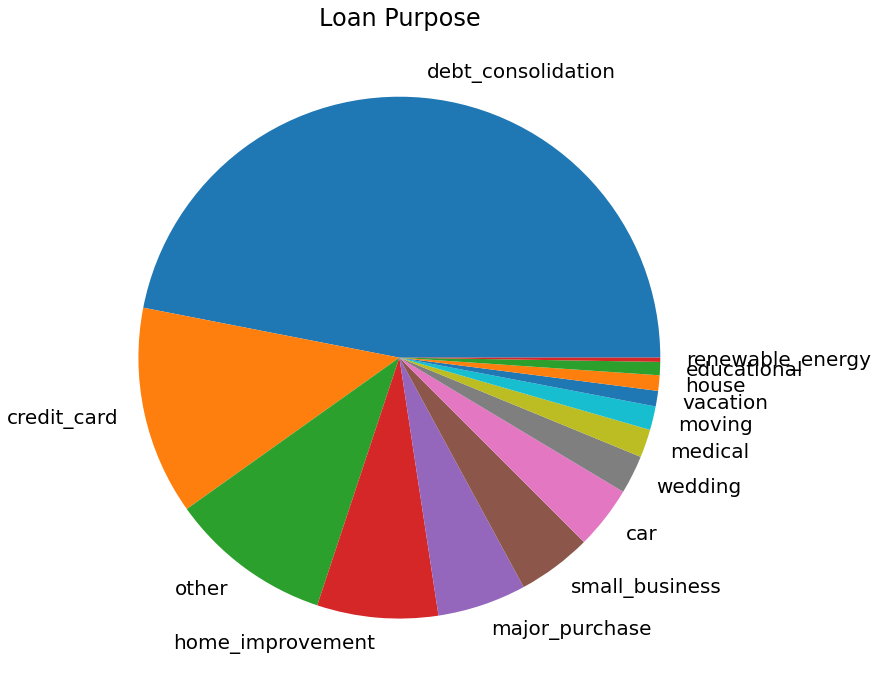

In [500]:
# Plot the distribution of the purpose of loans
df1['purpose'].value_counts().plot.pie(figsize=(12,12), textprops={'size': 20})
plt.title('Loan Purpose')
plt.ylabel('')
plt.show()

Text(0, 0.5, 'Loan Default Ratio %')

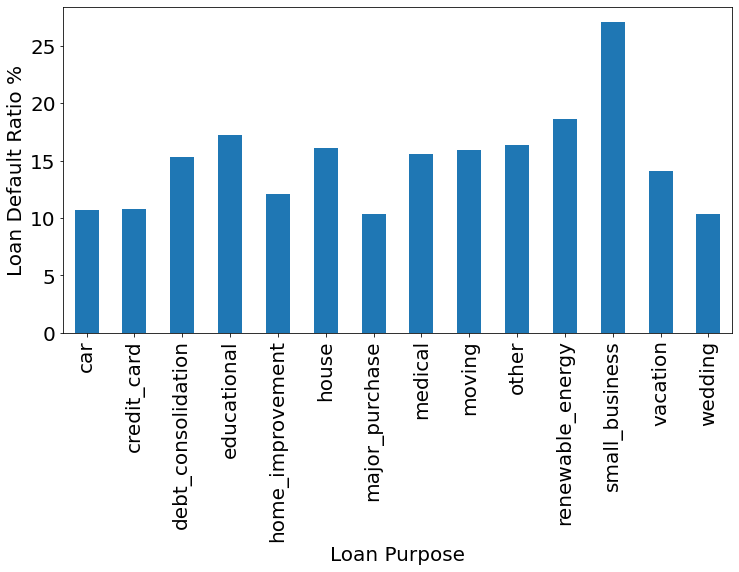

In [403]:
# Calculate and plot the default ratio for completed loans by the purpose of the loan
bad_loan_ratio_by_purpose = df_charged_off['purpose'].value_counts() / (df_charged_off['purpose'].value_counts() + df_fully_paid['purpose'].value_counts()) * 100
bad_loan_ratio_by_purpose.plot.bar(figsize=(12,6))
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Default Ratio %')

In [378]:
# Display the proportion of bad loans by purpose
bad_loan_ratio_by_purpose

car                   10.673783
credit_card           10.781778
debt_consolidation    15.325395
educational           17.230769
home_improvement      12.069565
house                 16.076294
major_purchase        10.325581
medical               15.565345
moving                15.972222
other                 16.377749
renewable_energy      18.627451
small_business        27.080958
vacation              14.133333
wedding               10.367171
Name: purpose, dtype: float64

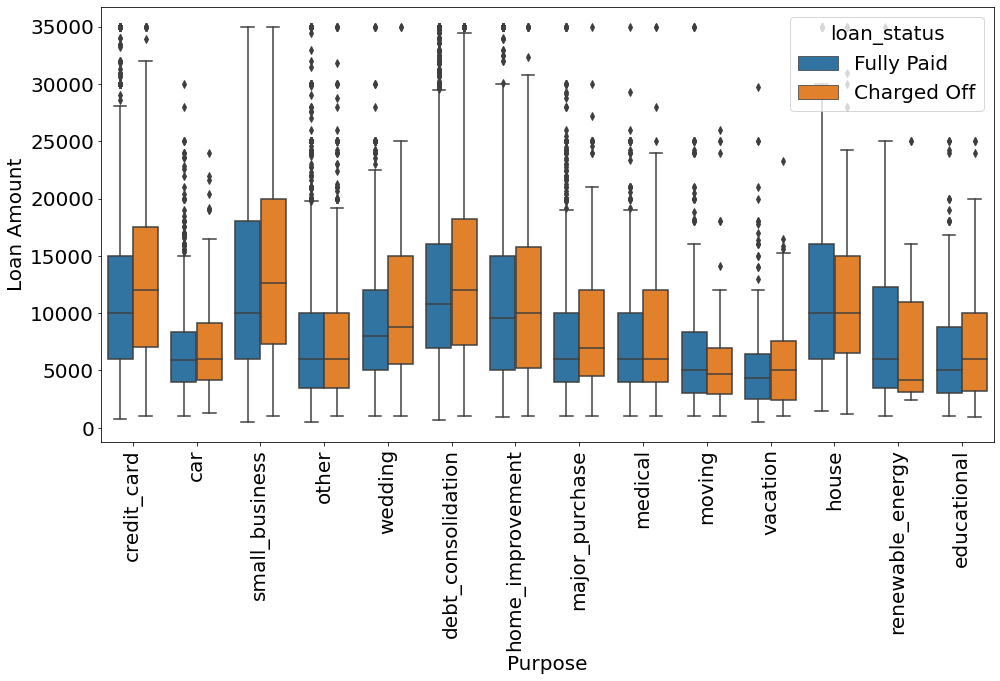

In [543]:
# Use a boxplot to see how the loan purpose and amount varies by the loan status
plt.figure(figsize=(16,8))
g = sns.boxplot(x="purpose", y="loan_amnt", data=df_completed, hue = "loan_status")
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.show()

In [380]:
# Find the number of loans by home ownership
home_ownership_counts = df1['home_ownership'].value_counts()
home_ownership_counts

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [381]:
# Drop the 'none' home ownership counts since they are outliers
home_ownership_counts = home_ownership_counts.drop('NONE')

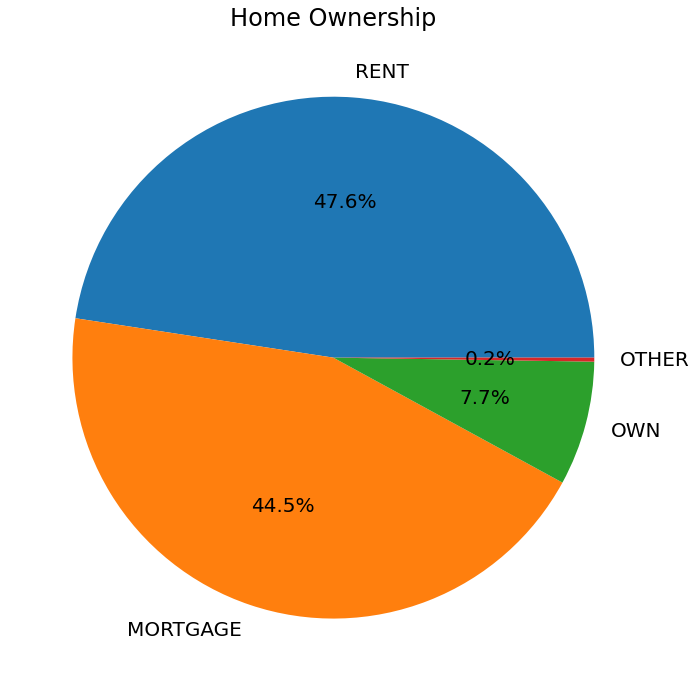

In [313]:
# Plot the home ownership status as a pie chart
home_ownership_counts.plot.pie(figsize=(12,12), autopct='%.1f%%', textprops={'size': 20})
plt.title('Home Ownership')
plt.ylabel('')
plt.rc('font', size=20)

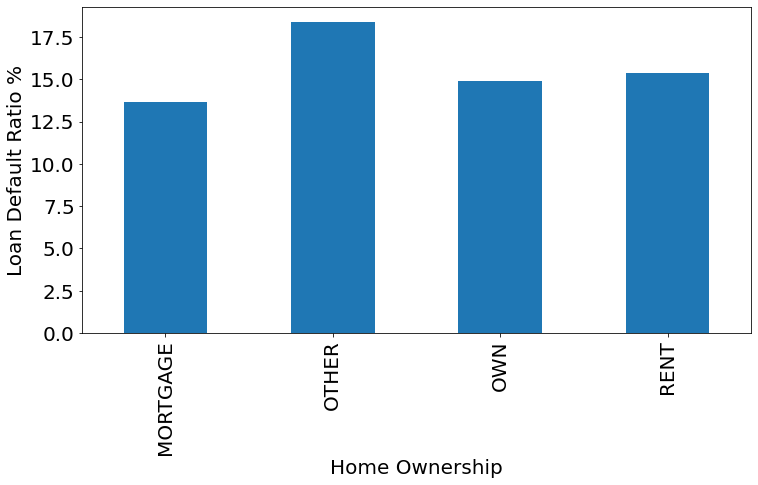

In [404]:
# Find and plot the proportion of bad loans by home ownership type
bad_loan_ratio_by_homeowner = df_charged_off['home_ownership'].value_counts() / (df_charged_off['home_ownership'].value_counts() + df_fully_paid['home_ownership'].value_counts()) * 100
bad_loan_ratio_by_homeowner = bad_loan_ratio_by_homeowner.drop('NONE')
bad_loan_ratio_by_homeowner.plot.bar(figsize=(12,6))
plt.xlabel('Home Ownership')
plt.ylabel('Loan Default Ratio %')
plt.rc('font', size=20)

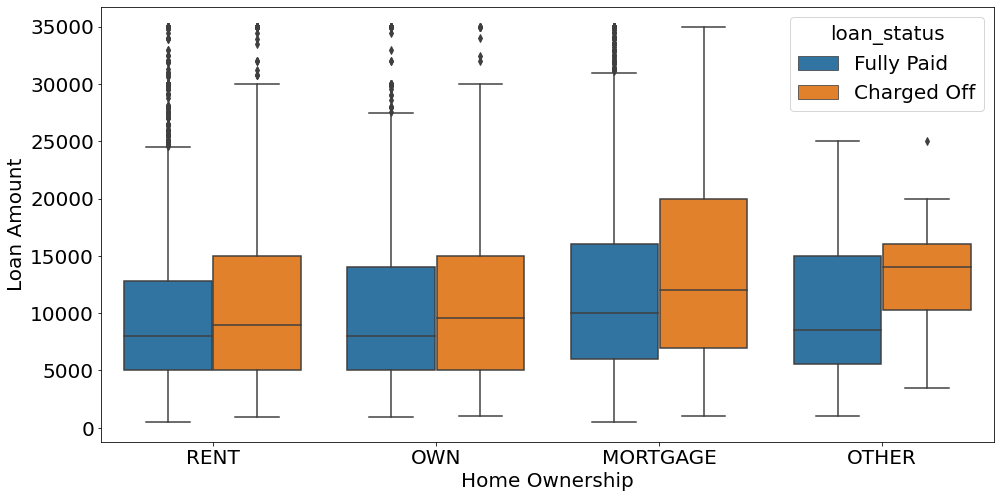

In [549]:
# Use a boxplot to see how the loan status varies by home ownership and and loan amount
df_loan_by_homeowner = df_completed[df_completed['home_ownership'] != 'NONE']
plt.figure(figsize=(16,8))
g = sns.boxplot(x="home_ownership", y="loan_amnt", data=df_loan_by_homeowner, hue = "loan_status")
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.show()

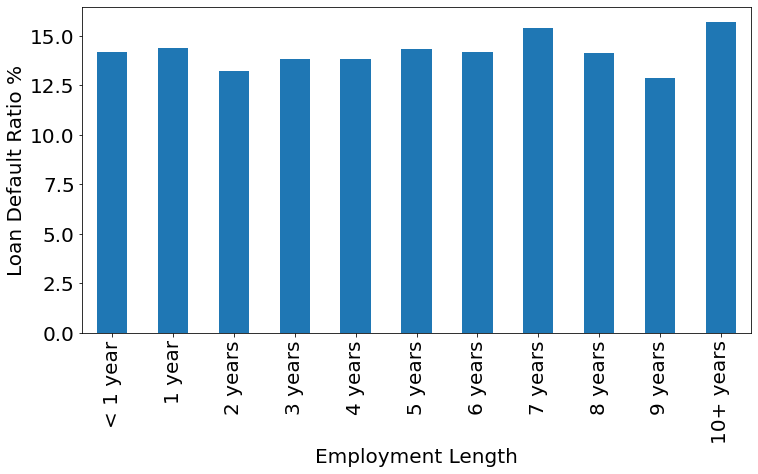

In [405]:
# Find and plot the proportion of bad loans by employment length
bad_loan_ratio_by_employment_length = df_charged_off['emp_length'].value_counts() / (df_charged_off['emp_length'].value_counts() + df_fully_paid['emp_length'].value_counts()) * 100
bad_loan_ratio_by_employment_length = bad_loan_ratio_by_employment_length.reindex(index = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
bad_loan_ratio_by_employment_length.plot.bar(figsize=(12,6))
plt.xlabel('Employment Length')
plt.ylabel('Loan Default Ratio %')
plt.rc('font', size=20)

Text(0, 0.5, 'Loan Default Ratio %')

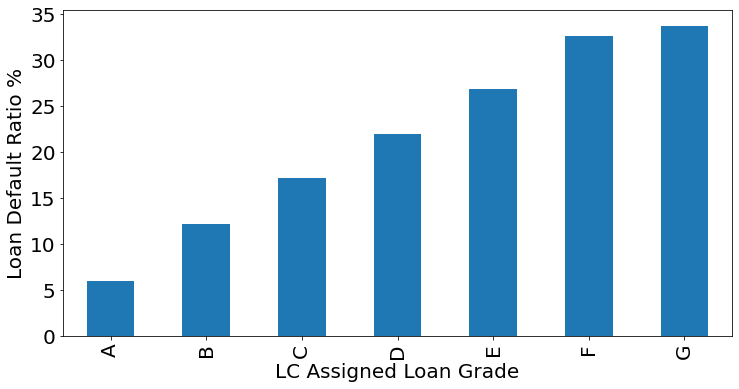

In [407]:
# Find and plot the proportion of bad loans by LC assigned loan grade
bad_loan_ratio_by_grade = df_charged_off['grade'].value_counts() / (df_charged_off['grade'].value_counts() + df_fully_paid['grade'].value_counts()) * 100
bad_loan_ratio_by_grade.plot.bar(figsize=(12,6))
plt.xlabel('LC Assigned Loan Grade')
plt.ylabel('Loan Default Ratio %')
plt.show

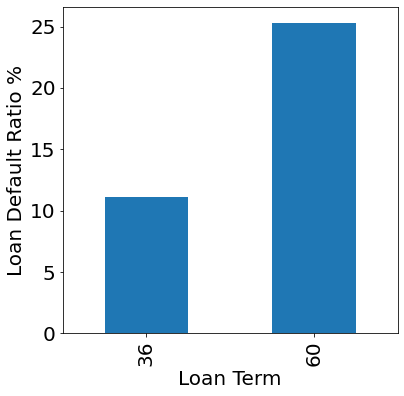

In [408]:
# Find and plot the proportion of bad loans by loan term
bad_loan_ratio_by_term = df_charged_off['term'].value_counts() / (df_charged_off['term'].value_counts() + df_fully_paid['term'].value_counts()) * 100
bad_loan_ratio_by_term.plot.bar(figsize=(6,6))
plt.xlabel('Loan Term')
plt.ylabel('Loan Default Ratio %')
plt.rc('font', size=20)

In [230]:
# Find the number of completed loans by application type
df_completed['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [232]:
# Get the statistics on annual income
df_completed['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [571]:
# Find the median annual income
df1['annual_inc'].median()

59000.0

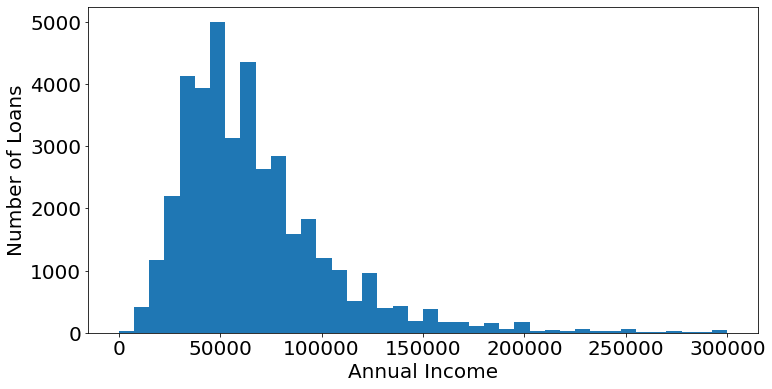

In [409]:
# Plot the distribution of annual income
plt.figure(figsize=(12,6))
plt.hist(df1['annual_inc'], 40, range=(0, 300000))
plt.xlabel('Annual Income')
plt.ylabel('Number of Loans')
plt.rc('font', size=20)
plt.show()

In [570]:
# Find the proportion of bad loans by annual income
annual_income_cut_bins = range(0, 300000, 10000)
fully_paid_loan_annual_income_buckets = pd.cut(df_fully_paid['annual_inc'], bins=annual_income_cut_bins, right=True)
charged_off_loan_annual_income_buckets = pd.cut(df_charged_off['annual_inc'], bins=annual_income_cut_bins, right=True)
bad_loan_ratio_by_annual_income = charged_off_loan_annual_income_buckets.value_counts() / (charged_off_loan_annual_income_buckets.value_counts() + fully_paid_loan_annual_income_buckets.value_counts()) * 100
bad_loan_ratio_by_annual_income

Text(0, 0.5, 'Loan Default Ratio %')

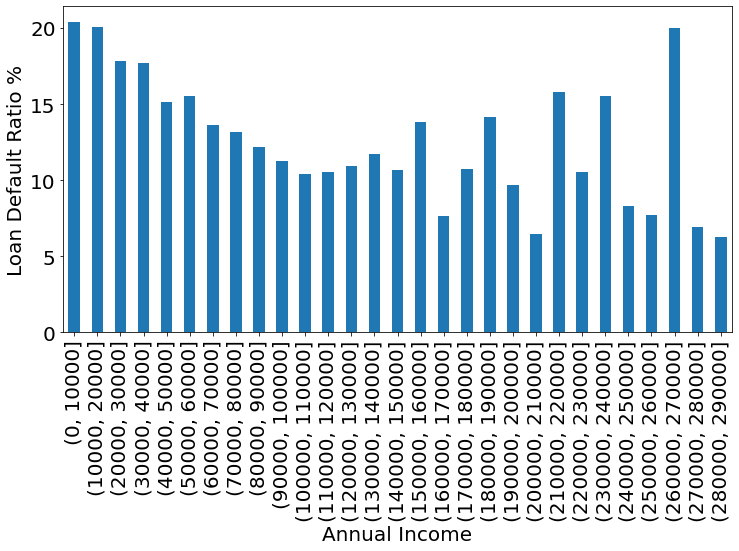

In [410]:
# Plot the proportion of bad loans by annual income
plt.figure(figsize=(12,6))
bad_loan_ratio_by_annual_income.plot.bar()
plt.xlabel('Annual Income')
plt.ylabel('Loan Default Ratio %')

Text(0, 0.5, 'Number of Loans')

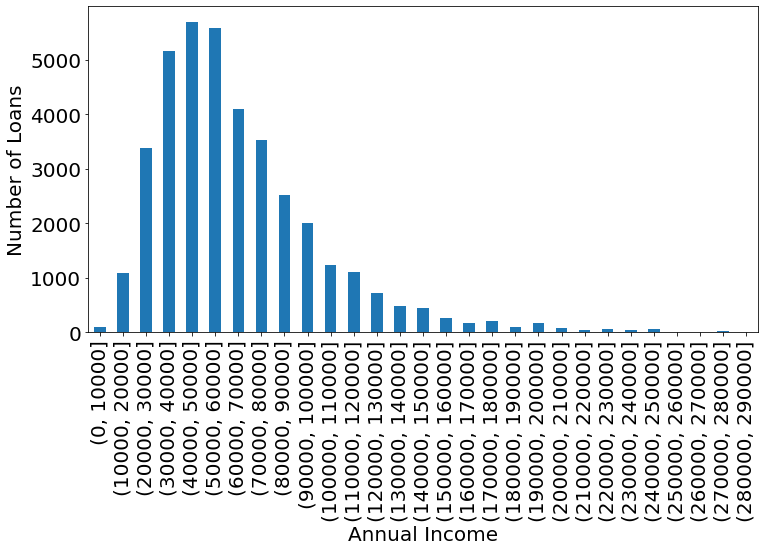

In [411]:
# Find and plot the number loans by annual income
completed_loans_by_amount = charged_off_loan_annual_income_buckets.value_counts() + fully_paid_loan_annual_income_buckets.value_counts()
plt.figure(figsize=(12,6))
completed_loans_by_amount.plot.bar()
plt.xlabel('Annual Income')
plt.ylabel('Number of Loans')

Text(0, 0.5, 'Loan Amount')

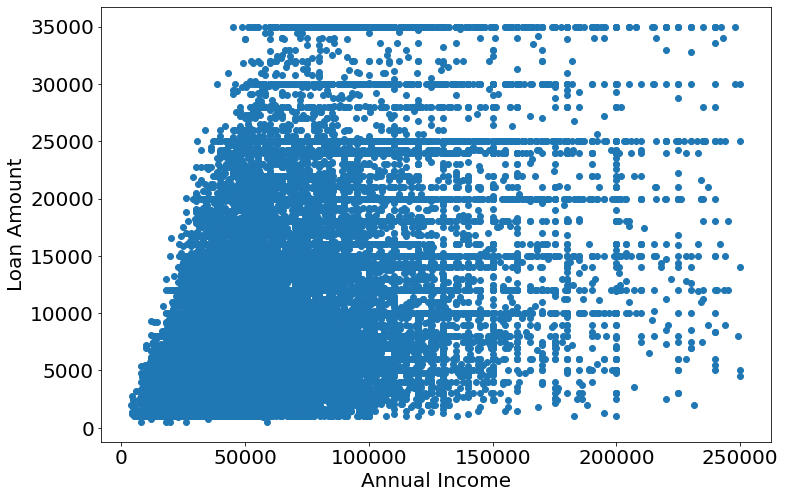

In [353]:
# Plot the loan amounts vs annual income
plt.figure(figsize=(12,8))
plt.scatter(df_income_outliers_removed['annual_inc'], df_income_outliers_removed['loan_amnt'])
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')

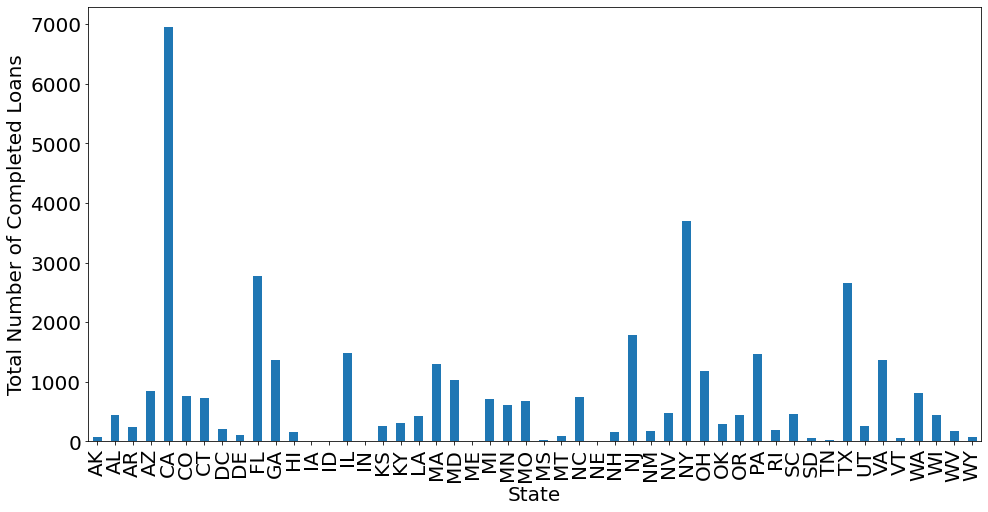

In [572]:
# Find and plot the number of loans by state
closed_loans_by_state = df_charged_off['addr_state'].value_counts() + df_fully_paid['addr_state'].value_counts()
plt.figure(figsize=(16,8))
closed_loans_by_state.plot.bar()
plt.xlabel('State')
plt.ylabel('Total Number of Completed Loans')
plt.show()

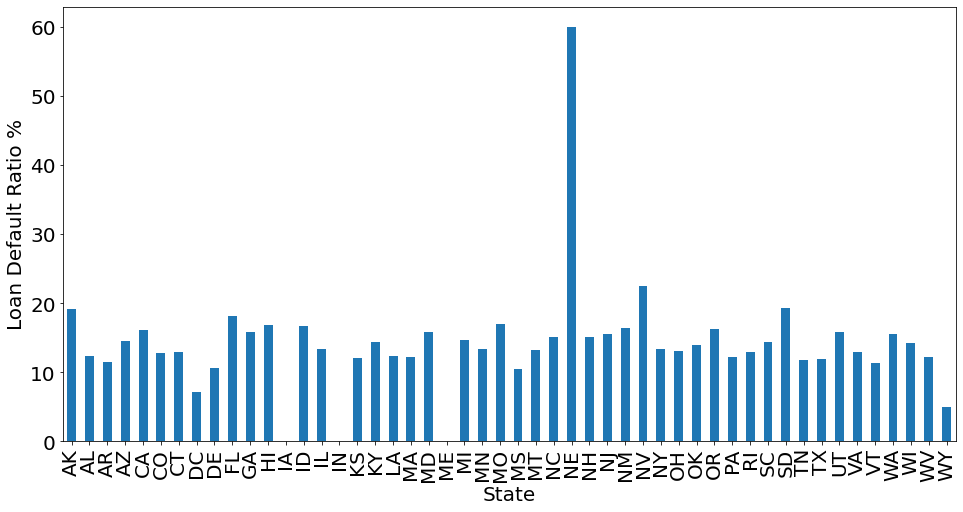

In [573]:
# Find and plot the proportion of bad loans by state
bad_loan_ratio_by_location = df_charged_off['addr_state'].value_counts() / (df_charged_off['addr_state'].value_counts() + df_fully_paid['addr_state'].value_counts()) * 100
plt.figure(figsize=(16,8))
bad_loan_ratio_by_location.plot.bar()
plt.xlabel('State')
plt.ylabel('Loan Default Ratio %')
plt.show()

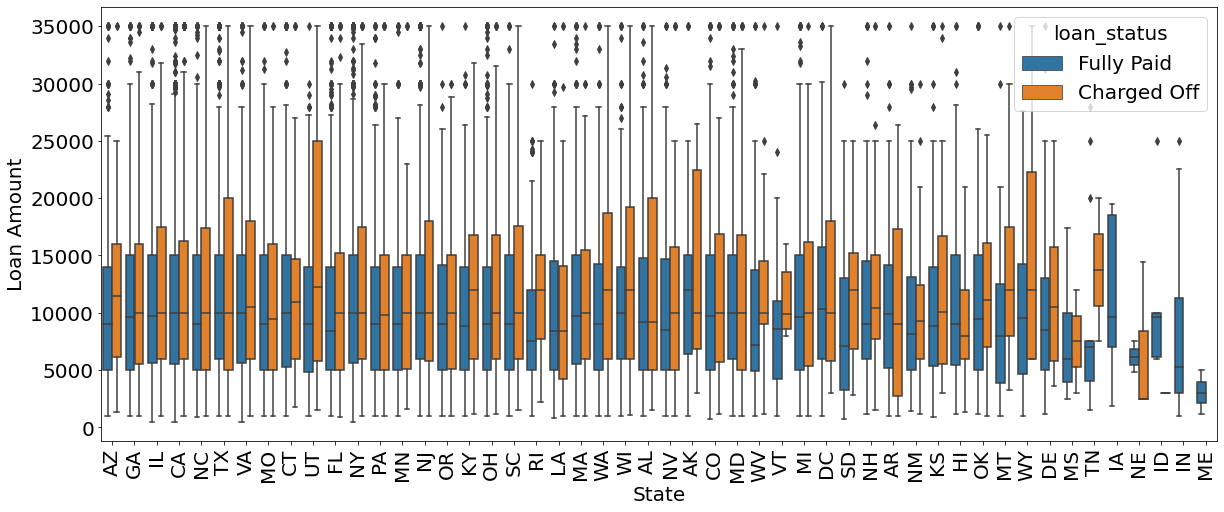

In [551]:
# Use a boxplot to see how the loan status varies by state and amount
plt.figure(figsize=(20,8))
g = sns.boxplot(x="addr_state", y="loan_amnt", data=df_completed, hue = "loan_status")
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Loan Amount')
plt.show()

In [574]:
# List the percentage of bad loans by location
bad_loan_ratio_by_location

AK    19.230769
AL    12.413793
AR    11.489362
AZ    14.487633
CA    16.189380
CO    12.793734
CT    12.947658
DC     7.109005
DE    10.619469
FL    18.122977
GA    15.820456
HI    16.867470
IA          NaN
ID    16.666667
IL    13.328823
IN          NaN
KS    12.156863
KY    14.469453
LA    12.412178
MA    12.259059
MD    15.835777
ME          NaN
MI    14.630682
MN    13.388430
MO    17.014925
MS    10.526316
MT    13.253012
NC    15.200000
NE    60.000000
NH    15.060241
NJ    15.530726
NM    16.393443
NV    22.546973
NY    13.385614
OH    13.157895
OK    13.937282
OR    16.321839
PA    12.261580
RI    12.886598
SC    14.379085
SD    19.354839
TN    11.764706
TX    11.884167
UT    15.873016
VA    12.929145
VT    11.320755
WA    15.525672
WI    14.318182
WV    12.209302
WY     5.000000
Name: addr_state, dtype: float64

In [575]:
# List the number of loans by location
df_completed['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64